In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('mycsv.csv')
df

,Date/Time,Date/Time (UTC),TOTAL WIND BASE SCHEDULE (FORECAST) IN BPA CONTROL AREA (MW; SCADA 187517,TOTAL WIND BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349,TOTAL WIND GENERATION IN BPA CONTROL AREA (MW; SCADA 79687),TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583),TOTAL HYDRO GENERATION (MW; SCADA 79682),TOTAL FOSSIL/BIOMASS GENERATION (MW; SCADA 164377),TOTAL NUCLEAR GENERATION (MW; 70681),NET INTERCHANGE (MW; SCADA 45581),TOTAL SOLAR BASE SCHEDULE (FORECAST) IN BPA CONTROL AREA (MW; SCADA 187513),TOTAL SOLAR Basepoint (FORECAST) IN BPA CONTROL AREA (MW; SCADA 177165),TOTAL SOLAR GENERATION IN BPA CONTROL AREA (MW; SCADA 142383)
0,01-01-2022 00:00,01-01-2022 08:00,NaN,27.0,5.0,8320.0,10817.0,1096.0,1159.0,4757.0,NaN,0.0,0.0
1,01-01-2022 00:05,01-01-2022 08:05,NaN,24.0,5.0,8338.0,10960.0,1079.0,1165.0,4872.0,NaN,0.0,0.0
2,01-01-2022 00:10,01-01-2022 08:10,NaN,21.0,5.0,8337.0,11036.0,1056.0,1164.0,4925.0,NaN,0.0,0.0
3,01-01-2022 00:15,01-01-2022 08:15,NaN,21.0,6.0,8342.0,11084.0,1037.0,1165.0,4950.0,NaN,0.0,0.0
4,01-01-2022 00:20,01-01-2022 08:20,NaN,21.0,6.0,8354.0,11085.0,1032.0,1161.0,4930.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86383,10/27/22 23:35,10/28/22 06:35,579.0,701.0,670.0,5282.0,4361.0,1097.0,1152.0,1998.0,0.0,0.0,0.0
86384,10/27/22 23:40,10/28/22 06:40,579.0,686.0,678.0,5244.0,4332.0,1095.0,1149.0,2013.0,0.0,0.0,0.0
86385,10/27/22 23:45,10/28/22 06:45,579.0,678.0,680.0,5223.0,4366.0,1096.0,1149.0,2068.0,0.0,0.0,0.0
86386,10/27/22 23:50,10/28/22 06:50,579.0,681.0,687.0,5216.0,4351.0,1097.0,1149.0,2069.0,0.0,0.0,0.0


In [21]:
df1 = df[['Date/Time', 'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)']]
df1.rename(columns={'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)': 'WindPower'}, inplace=True)
df1.set_index('Date/Time', inplace=True)
df1

C:\Users\cmaha\AppData\Local\Temp\ipykernel_26104\1315962383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)': 'WindPower'}, inplace=True)


,WindPower
Date/Time,
01-01-2022 00:00,5.0
01-01-2022 00:05,5.0
01-01-2022 00:10,5.0
01-01-2022 00:15,6.0
01-01-2022 00:20,6.0
...,...
10/27/22 23:35,670.0
10/27/22 23:40,678.0
10/27/22 23:45,680.0


In [22]:
rows_with_missing_values = df1[df1.isnull().any(axis=1)]

In [23]:
print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
                  WindPower
Date/Time                  
01-11-2022 08:20        NaN
02-01-2022 16:55        NaN
04/22/22 19:20          NaN
06/23/22 14:20          NaN
06/23/22 14:25          NaN
07/18/22 12:55          NaN
09/19/22 02:30          NaN
09/19/22 02:35          NaN
09/19/22 02:40          NaN
09/19/22 02:45          NaN
09/19/22 02:50          NaN
10-10-2022 15:10        NaN


In [24]:
df_cleaned = df1.dropna()

In [25]:
print("\nDataFrame after removing rows with missing values:")
print(df_cleaned)


DataFrame after removing rows with missing values:
                  WindPower
Date/Time                  
01-01-2022 00:00        5.0
01-01-2022 00:05        5.0
01-01-2022 00:10        5.0
01-01-2022 00:15        6.0
01-01-2022 00:20        6.0
...                     ...
10/27/22 23:35        670.0
10/27/22 23:40        678.0
10/27/22 23:45        680.0
10/27/22 23:50        687.0
10/27/22 23:55        694.0

[86376 rows x 1 columns]


In [26]:
df1.isnull().sum()

WindPower    12
dtype: int64

In [27]:
df_cleaned.isnull().sum()

WindPower    0
dtype: int64

In [28]:
df_new = df_cleaned.describe().transpose()
df_new

,count,mean,std,min,25%,50%,75%,max
WindPower,86376.0,732.712744,757.883117,0.0,81.0,422.5,1270.0,2641.0


In [29]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        # Extract a window of data with 'window_size' time steps
        window = df_as_np[i:i+window_size]

        # Append the window to X
        X.append(window)

        # Extract the label (next data point after the window)
        label = df_as_np[i+window_size]

        # Append the label to y
        y.append(label)

    # Convert X and y to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

In [39]:
WINDOW_SIZE = 12
X1, y1 = df_to_X_y(df_cleaned, WINDOW_SIZE)
X1.shape, y1.shape

((86364, 12, 1), (86364, 1))

In [40]:
length = len(df)

# Convert to integers
train_length = int(0.7 * length)
val_length = int(0.85 * length)

X_train1, y_train1 = X1[:train_length], y1[:train_length]
X_val1, y_val1 = X1[train_length:val_length], y1[train_length:val_length]
X_test1, y_test1 = X1[val_length:], y1[val_length:]

# Check the shapes
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

(60471, 12, 1) (60471, 1) (12958, 12, 1) (12958, 1) (12935, 12, 1) (12935, 1)


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape and flatten X_train1, X_val1, X_test1
X_train1_reshaped = X_train1.reshape(-1, X_train1.shape[-1])
X_val1_reshaped = X_val1.reshape(-1, X_val1.shape[-1])
X_test1_reshaped = X_test1.reshape(-1, X_test1.shape[-1])

# Fit and transform the scalers on the training data
X_train1_normalized = scaler_X.fit_transform(X_train1_reshaped)
y_train1_normalized = scaler_y.fit_transform(y_train1.reshape(-1, 1))

# Reshape the normalized data back to the original shape
X_train1_normalized = X_train1_normalized.reshape(X_train1.shape)
y_train1_normalized = y_train1_normalized.reshape(y_train1.shape)

# Transform the validation and test data using the fitted scalers
X_val1_normalized = scaler_X.transform(X_val1_reshaped)
X_test1_normalized = scaler_X.transform(X_test1_reshaped)

# Reshape the normalized data back to the original shape for validation and test
X_val1_normalized = X_val1_normalized.reshape(X_val1.shape)
X_test1_normalized = X_test1_normalized.reshape(X_test1.shape)

y_val1_normalized = scaler_y.transform(y_val1.reshape(-1, 1))

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((X1.shape[1],1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [43]:
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()]
)

In [45]:
history = model1.fit(X_train1_normalized, y_train1_normalized, validation_data=(X_val1_normalized, y_val1_normalized), epochs=100)


Epoch 1/100
1890/1890 [==============================] - 9s 5ms/step - loss: 3.8269e-04 - root_mean_squared_error: 0.0196 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 19272.2949 - val_loss: 1.9016e-04 - val_root_mean_squared_error: 0.0138 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 1833.4540
Epoch 2/100
1890/1890 [==============================] - 9s 5ms/step - loss: 2.6559e-04 - root_mean_squared_error: 0.0163 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 19806.1758 - val_loss: 1.4957e-04 - val_root_mean_squared_error: 0.0122 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 2354.7888
Epoch 3/100
1890/1890 [==============================] - 9s 5ms/step - loss: 2.2198e-04 - root_mean_squared_error: 0.0149 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 17233.5195 - val_loss: 1.2360e-04 - val_root_mean_squared_error: 0.0111 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percenta

1890/1890 [==============================] - 11s 6ms/step - loss: 8.7410e-05 - root_mean_squared_error: 0.0093 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13714.4902 - val_loss: 5.1712e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0043 - val_mean_absolute_percentage_error: 1067.7681
Epoch 26/100
1890/1890 [==============================] - 12s 6ms/step - loss: 8.7486e-05 - root_mean_squared_error: 0.0094 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13762.4521 - val_loss: 6.4712e-05 - val_root_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0055 - val_mean_absolute_percentage_error: 2289.5999
Epoch 27/100
1890/1890 [==============================] - 12s 6ms/step - loss: 8.6673e-05 - root_mean_squared_error: 0.0093 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 13472.4033 - val_loss: 5.1294e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_erro

1890/1890 [==============================] - 12s 6ms/step - loss: 8.4889e-05 - root_mean_squared_error: 0.0092 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12871.2432 - val_loss: 5.2319e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error: 996.8787
Epoch 50/100
1890/1890 [==============================] - 11s 6ms/step - loss: 8.4570e-05 - root_mean_squared_error: 0.0092 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12064.4873 - val_loss: 5.1244e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0045 - val_mean_absolute_percentage_error: 1788.6415
Epoch 51/100
1890/1890 [==============================] - 11s 6ms/step - loss: 8.4681e-05 - root_mean_squared_error: 0.0092 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12181.6494 - val_loss: 4.9122e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error

1890/1890 [==============================] - 10s 5ms/step - loss: 8.3547e-05 - root_mean_squared_error: 0.0091 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9841.6660 - val_loss: 5.5816e-05 - val_root_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 2224.3320
Epoch 74/100
1890/1890 [==============================] - 10s 5ms/step - loss: 8.3795e-05 - root_mean_squared_error: 0.0092 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10961.8828 - val_loss: 4.7364e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 608.1427
Epoch 75/100
1890/1890 [==============================] - 10s 5ms/step - loss: 8.3569e-05 - root_mean_squared_error: 0.0091 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10615.2861 - val_loss: 5.7341e-05 - val_root_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0047 - val_mean_absolute_percentage_error:

1890/1890 [==============================] - 12s 6ms/step - loss: 8.2971e-05 - root_mean_squared_error: 0.0091 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9612.3975 - val_loss: 4.8255e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error: 964.9119
Epoch 98/100
1890/1890 [==============================] - 12s 6ms/step - loss: 8.2798e-05 - root_mean_squared_error: 0.0091 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10098.9727 - val_loss: 4.8954e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 359.3083
Epoch 99/100
1890/1890 [==============================] - 11s 6ms/step - loss: 8.2796e-05 - root_mean_squared_error: 0.0091 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9547.0508 - val_loss: 4.7382e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 4

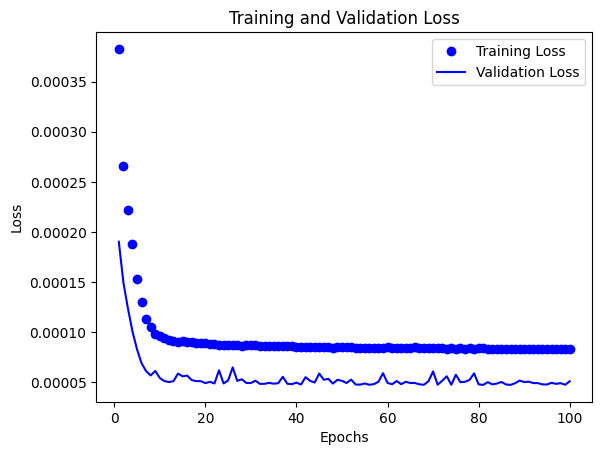

In [46]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
validation_results = model1.evaluate(X_val1_normalized, y_val1_normalized)

405/405 [==============================] - 1s 2ms/step - loss: 5.0804e-05 - root_mean_squared_error: 0.0071 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 394.2653


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((X1.shape[1],1)))
model2.add(LSTM(64, return_sequences=True)) 
model2.add(LSTM(32))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29,585
Trainable params: 29,585
Non-trainable params: 0
_________________________________________________________________


In [49]:
model2.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()]
)
history = model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20)

Epoch 1/20
1890/1890 [==============================] - 20s 8ms/step - loss: 1176125.1250 - root_mean_squared_error: 1084.4930 - mean_absolute_error: 769.9567 - mean_absolute_percentage_error: 9322294.0000 - val_loss: 927929.3125 - val_root_mean_squared_error: 963.2909 - val_mean_absolute_error: 653.6382 - val_mean_absolute_percentage_error: 2384925.0000
Epoch 2/20
1890/1890 [==============================] - 15s 8ms/step - loss: 1151989.6250 - root_mean_squared_error: 1073.3077 - mean_absolute_error: 755.8172 - mean_absolute_percentage_error: 10612098.0000 - val_loss: 904487.5625 - val_root_mean_squared_error: 951.0455 - val_mean_absolute_error: 637.2236 - val_mean_absolute_percentage_error: 1173988.8750
Epoch 3/20
1890/1890 [==============================] - 15s 8ms/step - loss: 1120851.2500 - root_mean_squared_error: 1058.7026 - mean_absolute_error: 737.9795 - mean_absolute_percentage_error: 10512661.0000 - val_loss: 875074.3750 - val_root_mean_squared_error: 935.4541 - val_mean_abs

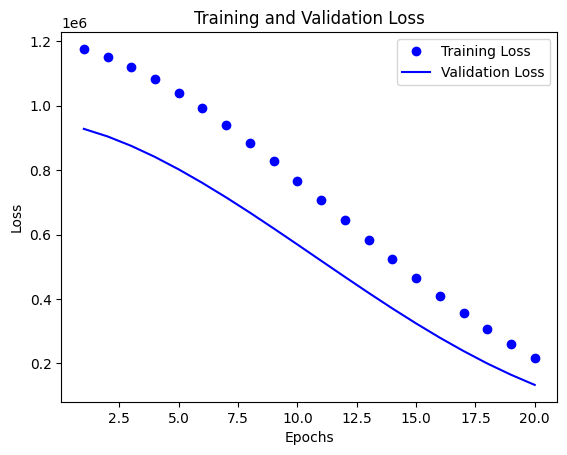

In [50]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, LSTM

model3 = Sequential()
model3.add(Conv1D(64, kernel_size=2, input_shape=(X1.shape[1],1)))  # Specify input shape here
model3.add(LSTM(64, return_sequences=True))  # Add LSTM layer with return_sequences=True
model3.add(Flatten())
model3.add(Dense(8, activation='relu'))  # Use 'activation' instead of just the activation function name
model3.add(Dense(1, activation='linear'))  # Use 'activation' instead of just the activation function name

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            192       
                                                                 
 lstm_4 (LSTM)               (None, 11, 64)            33024     
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 5640      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 38,865
Trainable params: 38,865
Non-trainable params: 0
_________________________________________________________________


In [52]:
model3.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()]
)
history = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20)

Epoch 1/20
1890/1890 [==============================] - 12s 5ms/step - loss: 1046212.5625 - root_mean_squared_error: 1022.8453 - mean_absolute_error: 699.0422 - mean_absolute_percentage_error: 9477205.0000 - val_loss: 677294.0000 - val_root_mean_squared_error: 822.9788 - val_mean_absolute_error: 504.1441 - val_mean_absolute_percentage_error: 2079895.3750
Epoch 2/20
1890/1890 [==============================] - 10s 5ms/step - loss: 649494.0000 - root_mean_squared_error: 805.9119 - mean_absolute_error: 491.3789 - mean_absolute_percentage_error: 5682633.5000 - val_loss: 292195.9688 - val_root_mean_squared_error: 540.5515 - val_mean_absolute_error: 292.5454 - val_mean_absolute_percentage_error: 1430982.7500
Epoch 3/20
1890/1890 [==============================] - 9s 5ms/step - loss: 230734.5156 - root_mean_squared_error: 480.3483 - mean_absolute_error: 248.2067 - mean_absolute_percentage_error: 3735329.0000 - val_loss: 69055.9141 - val_root_mean_squared_error: 262.7849 - val_mean_absolute_er

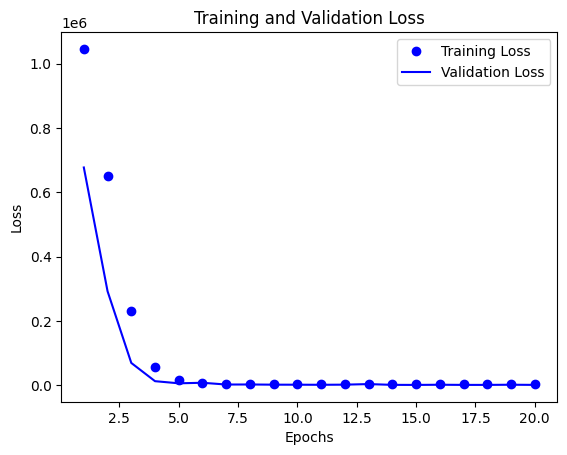

In [53]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()